<a href="https://colab.research.google.com/github/VladKarad/AI_education/blob/main/Diploma_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Тема, описание задачи.

  Утвержденная тема : 

   НС по предсказание цен на финансовый инструмент (акции, валютные пары, индексы..) с интеграцией в приложение (web , mql5...), с применением дополнительным данных (зависимость от других финансовых инструментов и данных).

  Описание задачи :

  Необходимо создать структуру по "realtime" анализу финансовых данных (цены на финансовый инструмент) и предсказанию их дальнейшего движения.



## 2. База (если нет конфиденциальных данных).

База :

  При наличии достаточного количества ресурсов для получения данных, существуют некоторые обременяющие нюансы. Ресурсы подразделились на три категории 🇰
- Платные : можно подобрать всю необходимую информацию;
- Бесплатные : нет необходимого набора данных и метода получения ;
- Бесплатные, но технически громоздкие :  можно подобрать всю  
       необходимую  информацию, но с дополнительной установкой сторонних
       программных продуктов

  Мною был выбран третий вариант. Торговый терминал Metatrader5 достаточно удобен для получения необходимых данных, но требуется его установка для параллельной работы. Сложность в том, что данный терминал корректно работает только под операционной системой Windows, что внесло ограничения на дальнейщее размещения готового продукта на сторонние бесплатные сервера и невозможность работы с Goocle Colab . В связи с вышеизложенным часть работ исполнялись с использованием Jupyter notebook.   





** Jupyter**

In [ ]:
# Импортируем неоходимые библиотеки для сбора базы данных

# Работа с MetaTrader5
import MetaTrader5 as mt5
# Работа с таблицами
import pandas as pd


# Выполняем инициализацию терминала Metatrader5

mt5.initialize()

login =  51182218
password = 'Wu7Gi1Z5t'
server = 'Alpari-MT5-Demo'

mt5.login(login, password, server)


# Задаем гиперпараметры для сбора данных

symbol_cur = 'GBPUSD'                # Символ исследуемого инструмента
dell_len = 50                        # Максимальная длина потенциальных данных NaN   
bar_len = 99000                      # Длина данных для для анализа
seq_len = 100                        # Размер окна данных для исследования
timeframe5 = mt5.TIMEFRAME_M5        # временной период получаемых данных 

# Функция получения и предобработки данных из терминала в Dataframe

def data_back(symbol_cur = symbol_cur,
              timeframe =  timeframe5,
              last_bar = 0,
              bars_to_load = bar_len
              ):
        # запросим bars_to_load баров на значение symbol_cur с таймфремом timeframe c текущего момента
    rates_back = mt5.copy_rates_from_pos(symbol_cur, timeframe, last_bar, bars_to_load )
        # создадим из полученных данных DataFrame
    rates_frame_back = pd.DataFrame(rates_back)
        # сконвертируем время в виде секунд в формат datetime
    rates_frame_back['time']=pd.to_datetime(rates_frame_back['time'], unit='s')
        # заменим индекс на datatime
    rates_frame_back.index = rates_frame_back['time']
        # добавим volume
    rates_frame_back['volume'] = rates_frame_back['tick_volume']
    
    return rates_frame_back

# Получаем предобработанные  даннех из терминала в Dataframe
data_b1 = data_back()

# Сохраняем данные в формате csv
data_b1.to_csv('fileM5.csv')


# 3. Параметризация данных.

  Параметризация данных ⁉

  После трехмесячных многочасовых исследований пришел к выводу, что при предсказании непосредственно цены финансового инструмента, нейронная сеть (НС), за минимальную ошибку выдает результат в виде максимально приближенного к предыдущему значению цены. Было рассмотрено большое количество различных способов параметризации. 
  На основе исследование было принято решение анализировать различные "производные" цены, на основе которых делать выводы о точках высокой вероятности изменения цены.
  Подбор множества различных вариантов взаимозависимостей цены от "производных" может занять не один десяток лет... Поэтому я остановился на варианте, достаточном, на мой взгляд, для отражения его в дипломной работе.
  В данном исследовании использовались индикаторы технического анализа  из библиотеки pandas_ta
  Индикатор CCI (Сommodity Сhannel Index )
  Индикатор MACD (Moving Average Convergence Divergence)
  Индикатор RSI (Relative Strength index)
  Индикатор RSX (Relative Strength Quality Index)
  Индикатор RVI (Relative Vigor Index)
  Индикатор Stochastic (Stochastic Oscillator) 
а так же функция np.diff() (возвращает n-ю разность элементов массива).
Для данных расчетов уместнее использовать Google Colab. 



**COLAB**

In [ ]:
# Инсталируем  неоходимые библиотеки для обработки данных

# Библиотека технического анализа pandas_ta
!pip install pandas_ta

# Библиотека визуализации финансовых данных
!pip install mplfinance

In [ ]:
# Импортируем неоходимые библиотеки для обработки данных

# Библиотека технического анализа pandas_ta
import pandas_ta as ta

# Визуальные инструменты Seaborn
import seaborn as sns
sns.set_style('darkgrid')


# Визуальные инструменты mplfinance
import mplfinance as mpf


# Модуль для работы с датой и временем
from datetime import datetime

# Работа с массивами
import numpy as np

# Работа с таблицами
import pandas as pd



# Генератор выборки временных рядов
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Нормировщики
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

# Загрузка датасетов из облака google
import gdown

# Работа с данными в формате pickle
import pickle

In [ ]:
# Подключение Google диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Параметры для расчетов
viz = 300           # длина  выборки для визуализации 
ddif = 7            # глубина разности элементов
n = 21              # глубина исследования технических индикаторов

In [ ]:

#data_b = pd.read_csv('/content/drive/MyDrive/MT5/NfileM5.csv')

#Загрузка и предобработка данных csv
data_b1 = pd.read_csv('/content/drive/MyDrive/MT5/NfileM5.csv').set_index('time')
data_b1.index = pd.to_datetime(data_b1.index)

# Делаем выборку для визуализации 
data_b300 = data_b1.iloc[-viz:]

# Подгатовка данных к исследованию
data= data_b1.drop(columns=['tick_volume','spread','real_volume', 'time.1']) # убираем ненужные столбцы
data.columns = [ x.upper() for x in data.columns]                            # переводим в верхний регистр названия OHLCV


# Расчет  в цикле по всему массиву

  # разности элементов OHLC 
for ii in range(1, ddif+1): 
    data['OPEN' + str(ii)] = np.nan
    data['OPEN' + str(ii)] = data['OPEN'] + data['OPEN'].diff(periods= ii)
    
    data['CLOSE' + str(ii)] = np.nan
    data['CLOSE' + str(ii)] = data['CLOSE'] + data['CLOSE'].diff(periods= ii)
    
    data['HIGH' + str(ii)] = np.nan
    data['HIGH' + str(ii)] = data['HIGH'].rolling(ii).max() 
    
    data['LOW' + str(ii)] = np.nan
    data['LOW' + str(ii)] = data['LOW'].rolling(ii).min()   
    
    # Расчет индикаторов CCI, MACD, RVI, RSX, Stochastic к разности элементов OHLC 
            
    cci_nn = []
    for x in range(4,n+1):
      cci_nn.append("cci_" + str(x) + str(ii))
      a = ta.cci(data['HIGH'+ str(ii)], data['LOW'+ str(ii)], data['CLOSE'], x)
      #exec(f'cci_{x}{ii} = a')
      data[cci_nn[x-4]] = a
         
    macd =  ta.macd(data['CLOSE'+ str(ii)], fast = 3, slow = 7, signal = 6)
    data['m'+ str(ii)] = macd.iloc[:,0]   
    data['mh'+ str(ii)] = macd.iloc[:,1]
    data['ms'+ str(ii)] = macd.iloc[:,2]
    
    rvi = ta.rvgi(data['OPEN'+ str(ii)],data['HIGH'+ str(ii)],data['LOW'+ str(ii)],data['CLOSE'+ str(ii)],1)
    data['rvi'+ str(ii)] = rvi.iloc[:,0]   
    data['rvis'+ str(ii)] = rvi.iloc[:,1]
    
    data['rsi'+ str(ii)] = ta.rsi(data['CLOSE'+ str(ii)],3)
  
    data['rsx'+ str(ii)] = ta.rsx(data['CLOSE'+ str(ii)],3)
    
    stoch = ta.stoch(data['HIGH'+ str(ii)],data['LOW'+ str(ii)],data['CLOSE'+ str(ii)],7,4,4)
    data['stoch0'+ str(ii)] = stoch.iloc[:,0]   
    data['stoch1'+ str(ii)] = stoch.iloc[:,1]
        
# Расчет индикаторов CCI, MACD, RVI, RSX, Stochastic        
    
cci_nn = []
for x in range(4,n+1):
  cci_nn.append("cci_" + str(x))
  a = ta.cci(data['HIGH'], data['LOW'], data['CLOSE'], timeperiod=x)
  #exec(f'cci_{x} = a')
  data[cci_nn[x-4]] = a
    
macd =  ta.macd(data['CLOSE'], fast = 3, slow = 7, signal = 6)
data['m'] = macd.iloc[:,0]   
data['mh'] = macd.iloc[:,1]
data['ms'] = macd.iloc[:,2]    

rvi = ta.rvgi(data['OPEN'],data['HIGH'],data['LOW'],data['CLOSE'],1)
data['rvi'] = rvi.iloc[:,0]   
data['rvis'] = rvi.iloc[:,1]
    
data['rsi'] =  ta.rsi(data['CLOSE'],3)

data['rsx'] = ta.rsx(data['CLOSE'],3)

stoch = ta.stoch(data['HIGH'],data['LOW'],data['CLOSE'],7,4,4)
data['stoch0'] = stoch.iloc[:,0]   
data['stoch1'] = stoch.iloc[:,1]

# Удаление строк с неполными данными
data.dropna(inplace=True)

# Задание текстовых меток каналов данных (столбцов)
CHANNEL_NAMES = data.columns 

# Получение словаря с именами и индексами каналов данных
CHANNEL_INDEX = {name: chan for chan, name in enumerate(CHANNEL_NAMES)}
print(CHANNEL_INDEX)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, u

{'OPEN': 0, 'HIGH': 1, 'LOW': 2, 'CLOSE': 3, 'VOLUME': 4, 'OPEN1': 5, 'CLOSE1': 6, 'HIGH1': 7, 'LOW1': 8, 'cci_41': 9, 'cci_51': 10, 'cci_61': 11, 'cci_71': 12, 'cci_81': 13, 'cci_91': 14, 'cci_101': 15, 'cci_111': 16, 'cci_121': 17, 'cci_131': 18, 'cci_141': 19, 'cci_151': 20, 'cci_161': 21, 'cci_171': 22, 'cci_181': 23, 'cci_191': 24, 'cci_201': 25, 'cci_211': 26, 'm1': 27, 'mh1': 28, 'ms1': 29, 'rvi1': 30, 'rvis1': 31, 'rsi1': 32, 'rsx1': 33, 'stoch01': 34, 'stoch11': 35, 'OPEN2': 36, 'CLOSE2': 37, 'HIGH2': 38, 'LOW2': 39, 'cci_42': 40, 'cci_52': 41, 'cci_62': 42, 'cci_72': 43, 'cci_82': 44, 'cci_92': 45, 'cci_102': 46, 'cci_112': 47, 'cci_122': 48, 'cci_132': 49, 'cci_142': 50, 'cci_152': 51, 'cci_162': 52, 'cci_172': 53, 'cci_182': 54, 'cci_192': 55, 'cci_202': 56, 'cci_212': 57, 'm2': 58, 'mh2': 59, 'ms2': 60, 'rvi2': 61, 'rvis2': 62, 'rsi2': 63, 'rsx2': 64, 'stoch02': 65, 'stoch12': 66, 'OPEN3': 67, 'CLOSE3': 68, 'HIGH3': 69, 'LOW3': 70, 'cci_43': 71, 'cci_53': 72, 'cci_63': 73,

In [ ]:
# Проверка данных на недопустимые значения inf которые иногда возникают после обработки индикаторами
# и, при наличии ,  замена на нулевые значения

count = np.isinf(data).values.sum()
print("It contains " + str(count) + " infinite values")
col_name = data.columns.to_series()[np.isinf(data).any()]
print(col_name)
data.replace([np.inf, -np.inf], 0, inplace=True)

It contains 0 infinite values
Series([], dtype: object)


In [ ]:
# Переводим данные в формат numpy
data = data.to_numpy()



In [ ]:
# Задание гиперпараметров

CHANNEL_X = CHANNEL_NAMES                 # Отбор каналов входных данных
CHANNEL_Y = ['HIGH', 'LOW', 'CLOSE','HIGH7', 'LOW7', 'CLOSE7','cci_4', 'cci_5', 
             'cci_7','cci_14','cci_47', 'cci_57', 'cci_77','cci_147','m', 'mh', 
             'ms','rvi', 'rvis', 'rsi', 'rsx', 'stoch0', 'stoch1','m7', 'mh7', 
             'ms7','rvi7', 'rvis7', 'rsi7', 'rsx7', 'stoch07', 'stoch17' ]                     # Отбор каналов данных для предсказания
SEQ_LEN = 100                             # Длина прошедших данных для анализа
BATCH_SIZE = 20                           # Объем батча для генератора
TEST_LEN = 1000 # Объем тестовой выборки
TRAIN_LEN = data.shape[0] - TEST_LEN  - TEST_LEN    # Объем обучающей выборки


In [ ]:
# Делаем выборку для визуализации
data_b = data[-viz-SEQ_LEN:]

In [ ]:
# Формирование списков индексов каналов данных для входных и выходных выборок
chn_x = [CHANNEL_INDEX[c] for c in CHANNEL_X]
chn_y = [CHANNEL_INDEX[c] for c in CHANNEL_Y]

# Проверка результата
print(chn_x, chn_y)

# Разделение данных на тренировочный и тестовый наборы
# 2*SEQ_LEN - для разрыва между тренировочными и тестовыми данными 
# варьируемый параметр, страховка от пересечения
data_train, data_test = data[:TRAIN_LEN], data[TRAIN_LEN + 2*SEQ_LEN:-TEST_LEN]

# Отбор входных данных
x_data_train, x_data_test = data_train[:, chn_x], data_test[:, chn_x]

# Масштабирование данных
x_scaler = MinMaxScaler()
x_scaler.fit(x_data_train)
x_data_train = x_scaler.transform(x_data_train)
x_data_test = x_scaler.transform(x_data_test)

# Отбор выходных данных
y_data_train, y_data_test = data_train[:, chn_y], data_test[:, chn_y]

# Масштабирование данных
y_scaler = MinMaxScaler()
y_scaler.fit(y_data_train)
y_data_train = y_scaler.transform(y_data_train)
y_data_test = y_scaler.transform(y_data_test)

# Проверка формы данных
print(f'Train data: {x_data_train.shape}, {y_data_train.shape}')
print(f'Test  data: {x_data_test.shape}, {y_data_test.shape}')

# Создание генератора для обучения
train_datagen = TimeseriesGenerator(x_data_train, 
                                    y_data_train,
                                    length=SEQ_LEN,
                                    stride=1,
                                    sampling_rate=1,
                                    batch_size=BATCH_SIZE)

# Аналогичный генератор для валидации при обучении
val_datagen = TimeseriesGenerator(x_data_test, 
                                  y_data_test,
                                  length=SEQ_LEN,
                                  stride=1,
                                  sampling_rate=1,
                                  batch_size=BATCH_SIZE)

# Проверка формы выдаваемого генератором результата
print(f'Train batch x: {train_datagen[0][0].shape}, y: {train_datagen[0][1].shape}')


# Генератор тестовой выборки, генерирует один батч на всю выборку
test_datagen = TimeseriesGenerator(x_data_test, 
                                   y_data_test,
                                   length=SEQ_LEN,
                                   stride=1,
                                   sampling_rate=1,
                                   batch_size=x_data_test.shape[0])

# Формирование тестовой выборки из генератора
x_test, y_test = test_datagen[0]

# Проверка формы тестовой выборки
print(f'Test x: {x_test.shape}, y: {y_test.shape}')




# Сохраняем данные нормализации
pickle.dump(x_scaler, open('/content/drive/MyDrive/MT5/p5allccirviCol60x.pkl','wb'))
pickle.dump(y_scaler, open('/content/drive/MyDrive/MT5/p5allccirviCol60y.pkl','wb'))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
# Формирование списков индексов каналов данных для входных и выходных выборок для визаулизации в mplfinance
chn_x = [CHANNEL_INDEX[c] for c in CHANNEL_X]
chn_y = [CHANNEL_INDEX[c] for c in CHANNEL_Y]

# Проверка результата
print(chn_x, chn_y)

# Отбор входных данных
x_data_b_test = data_b[:, chn_x]

# Масштабирование данных
x_data_b_test = x_scaler.transform(x_data_b_test)

# Отбор выходных данных
y_data_b_test =  data_b[:, chn_y]

# Масштабирование данных
y_data_b_test = y_scaler.transform(y_data_b_test)

# Проверка формы данных
print(f'Test  data: {x_data_b_test.shape}, {y_data_b_test.shape}')


# Генератор тестовой выборки, генерирует один батч на всю выборку
test_b_datagen = TimeseriesGenerator(x_data_b_test, 
                                   y_data_b_test,
                                   length=SEQ_LEN,
                                   stride=1,
                                   sampling_rate=1,
                                   batch_size=x_data_b_test.shape[0])

# Формирование тестовой выборки из генератора
x_b_test, y_b_test = test_b_datagen[0]

# Проверка формы тестовой выборки
print(f'Test x: {x_b_test.shape}, y: {y_b_test.shape}')


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

# 4. Архитектура нейросети

  Архитектура нейросети:
  Для подбора архитектуры нейросети  использовались генетические алгоритмы подбора гиперпарвметров. В состав подбова входили слои  Dense, Dropout, Conv1D, LSTM, MaxPooling1D, BatchNormalization, Flatten, GlobalAveragePooling1D, Activation, GlobalMaxPooling1D, RepeatVector с различными гиперпараметрами, линейной и нелинейной архитектурой ...
  Но, как ни странно, лучший результат показывали простые Dense слои. Они оказались и тотнее , и легче.

In [ ]:
# Импортируем неоходимые библиотеки для обработки данных

# Визуальные инструменты plotly
import plotly.express as px

# This allows multiple outputs from a single jupyter notebook cell:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

# Классы-конструкторы моделей нейронных сетей
from tensorflow.keras.models import Sequential, Model
from keras.models import load_model

# Основные слои
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM, GlobalMaxPooling1D, MaxPooling1D, RepeatVector

# Оптимизаторы
from tensorflow.keras.optimizers import Adam

# Отрисовка графиков
import matplotlib.pyplot as plt

# Назначение размера и стиля графиков по умолчанию
from pylab import rcParams
plt.style.use('ggplot')
rcParams['figure.figsize'] = (14, 7)

# Отрисовка графики в ячейке colab
%matplotlib inline

# Отключение предупреждений
import warnings
warnings.filterwarnings('ignore')


from keras.callbacks import EarlyStopping, ModelCheckpoint

# Load the TensorBoard notebook extension
%load_ext tensorboard

import tensorflow as tf

from tensorflow.python.keras.callbacks import TensorBoard


In [ ]:
# Сервисные Функции

# Функция расчета результата прогнозирования сети (предсказания)

def get_pred(model, # модель
             x_test, y_test, # тестовая выборка
             y_scaler): # масштабирующий объект для y

    # Вычисление и деномализация предсказания
    y_pred_unscaled = y_scaler.inverse_transform(model.predict(x_test))

    # Денормализация верных ответов
    y_test_unscaled = y_scaler.inverse_transform(y_test)

    # Возврат результата предсказания и верные ответы в исходном масштабе
    return y_pred_unscaled, y_test_unscaled    

# Функция расчета результата прогнозирования сети (предсказания)

def get_b_pred(model, # модель
             x_b_test, y_b_test, # тестовая выборка
             y_scaler): # масштабирующий объект для y

    # Вычисление и деномализация предсказания
    y_b_pred_unscaled = y_scaler.inverse_transform(model.predict(x_b_test))

    # Денормализация верных ответов
    y_b_test_unscaled = y_scaler.inverse_transform(y_b_test)

    # Возврат результата предсказания и верные ответы в исходном масштабе
    return y_b_pred_unscaled  , y_b_test_unscaled    

# Функция расчета корреляционного коэффициента Пирсона для двух рядов

def correlate(a, b):
    return np.corrcoef(a, b)[0, 1]


# Функция визуализации результата предсказания сети и верных ответов

def show_predict(y_pred, y_true, # прогноз данных и исходный ряд
                 start, # точка ряда, с которой начинается отрисовка графика
                 length, # количество точек для отрисовки графика
                 chn_list=None, # список каналов данных для отрисовки (по умолчанию все)
                 chn_names=CHANNEL_Y, # список имен каналов данных
                 title=''):
  
    # Если список каналов пуст - отображаются все каналы
    if not chn_list:
        chn_list = list(range(y_true.shape[1]))

    # Построение графика по всем каналам данных
    plt.figure(figsize=(22, 6))
    
    for chn in chn_list:
        plt.plot(y_pred[start:start + length, chn],
                label=f'{chn_names[chn]} Прогноз')
        plt.plot(y_true[start:start + length, chn], 
                label=f'{chn_names[chn]} Базовый')

    plt.title(title)
    plt.xlabel('Время')
    plt.ylabel('Данные')
    plt.legend()
    plt.show()


# Функция рисования корреляций прогнозного ряда и исходного со смещением

def show_corr(y_pred, y_true, # прогноз данных и исходный ряд
              back_steps_max=30, # максимальное количество шагов смещения назад по времени
              chn_list=None, # список каналов данных для отрисовки (по умолчанию все)
              chn_names=CHANNEL_Y, 
              title=''): # список имен каналов данных
  
    # Если список каналов пуст - отображаются все каналы
    if not chn_list:
        chn_list = list(range(y_true.shape[1]))

    y_len = y_true.shape[0]
    steps = range(0, back_steps_max + 1)

    # Построение графика по всем каналам данных
    plt.figure(figsize=(14, 7))

    for chn in chn_list:
        # Вычисление коэффициентов корреляции базового ряда и предсказания с разным смещением
        cross_corr = [correlate(y_true[:y_len - step, chn], y_pred[step:, chn]) for step in steps]
        # Вычисление коэффициентов автокорреляции базового ряда с разным смещением
        auto_corr = [correlate(y_true[:y_len - step, chn], y_true[step:, chn]) for step in steps]

        plt.plot(cross_corr, label=f'{chn_names[chn]} Прогноз')
        plt.plot(auto_corr, label=f'{chn_names[chn]} Эталон')

    plt.title(title)
    
    # Назначение меток шкалы оси x
    plt.xticks(steps)
    plt.xlabel('Шаги смещения')
    plt.ylabel('Коэффициент корреляции')
    plt.legend()
    plt.show()    


# Функция визуализации результата работы сети

def eval_net(model, # модель
             x_test, y_test, # тестовая выборка
             y_scaler, # нормировщик выхода
             start=0, length=500, back_steps_max=30, # параметры отображения графиков
             title=''):
  
    # Получение денормализованного предсказания и данных базового ряда
    y_pred, y_true = get_pred(model, x_test, y_test, y_scaler)
    
    # Отрисовка графика сопоставления базового и прогнозного рядов
    # Прогнозный ряд сдвигается на 1 шаг назад, так как предсказание делалось на 1 шаг вперед 
    show_predict(y_pred[1:], y_true[:-1], start, length, 
                 title=f'{title}: Сопоставление базового и прогнозного рядов')
    # Отрисовка графика корреляционных коэффициентов до заданного максимума шагов смещения
    show_corr(y_pred, y_true, back_steps_max=back_steps_max, 
              title=f'{title}: Корреляционные коэффициенты по шагам смещения')    
    

   # Функция обучения модели и отрисовки прогресса и оценки результатов 

def train_eval_net(model, # модель
                   train_datagen, val_datagen, # генераторы обучающей и проверочной выборок
                   epoch_list, # список эпох в виде [(epochs1, opt1), (epochs2, opt2), ...]
                   x_test, y_test, 
                   y_scaler, 
                   start=0, 
                   length=500, 
                   back_steps_max=30, 
                   title='',
                   model_filename = '/content/drive/MyDrive/model13.h5',
                   log_dir= '/content/drive/MyDrive/'):
  
    # Отображение сводки модели
    model.summary()
    #early_stop = EarlyStopping(monitor='val_acc', min_delta=0.0001,
                          # patience=5, verbose=1, mode='auto')


    # Обучение модели в несколько фаз в соответствии со списком epoch_list
    for epochs, opt in epoch_list:
        # Компиляция модели
        model.compile(loss='mse', optimizer=opt)

        chkpt = ModelCheckpoint(path+model_filename , 
                        monitor='val_loss', 
                        verbose=1, 
                        save_best_only=True, 
                        mode='auto')
        tboard = TensorBoard(log_dir=log_dir, histogram_freq=1, write_images=True)
        
        print(log_dir)
        
        callbacks = [chkpt, tboard] # early_stop,

        # Фаза обучения модели
        print(f'Обучение {epochs} эпох')
        history = model.fit(train_datagen, 
                            epochs=epochs, 
                            validation_data=val_datagen,
                            verbose=1,
                            callbacks=callbacks)

        # Рисование графиков прошедшей фазы обучения
        fig = plt.figure(figsize=(14, 7))
        plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
        plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
        plt.title(f'{title}: График прогресса обучения')
        # Указание показывать только целые метки шкалы оси x
        fig.gca().xaxis.get_major_locator().set_params(integer=True)
        plt.xlabel('Эпоха обучения')
        plt.ylabel('Средняя ошибка')
        plt.legend()
        plt.show()

        # Рисование графиков оценки результата работы модели после фазы обучения
        eval_net(model, x_test, y_test, y_scaler, start=start, 
                 length=length, back_steps_max=back_steps_max, title=title) 

In [ ]:
# Простая полносвязная сеть
model_dense = Sequential()
model_dense.add(Dense(512, input_shape=x_test.shape[1:], activation='relu'))
model_dense.add(Flatten())
model_dense.add(Dense(y_test.shape[1], activation='linear'))

model_dense.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100, 512)          128000    
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_3 (Dense)             (None, 32)                1638432   
                                                                 
Total params: 1,766,432
Trainable params: 1,766,432
Non-trainable params: 0
_________________________________________________________________


# 5. Графическое подтверждение (графики обучения…)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100, 512)          128000    
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_3 (Dense)             (None, 32)                1638432   
                                                                 
Total params: 1,766,432
Trainable params: 1,766,432
Non-trainable params: 0
_________________________________________________________________
/content/drive/MyDrive/logs/gbpusd_N_5 
Обучение 10 эпох
Epoch 1/10
4834/4844 [============================>.] - ETA: 0s - loss: 0.0128
Epoch 1: val_loss improved from inf to 0.01040, saving model to /content/drive/MyDrive/gbpusd_N_5 .h5
4844/4844 [==============================] - 28s 5ms/step - loss: 0.01

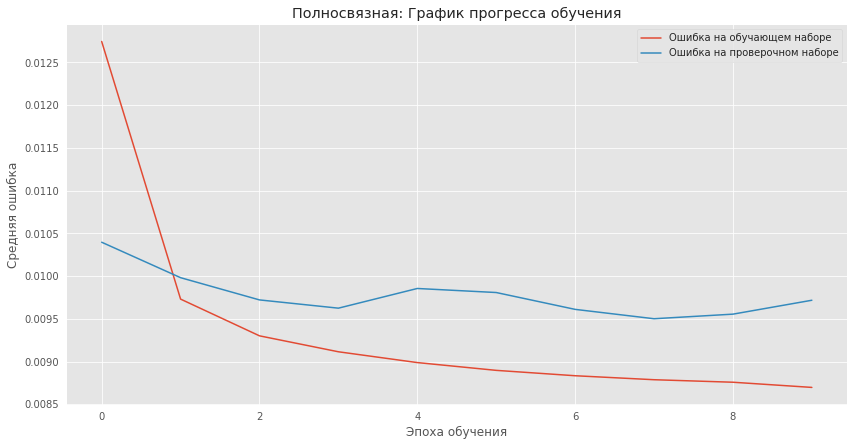

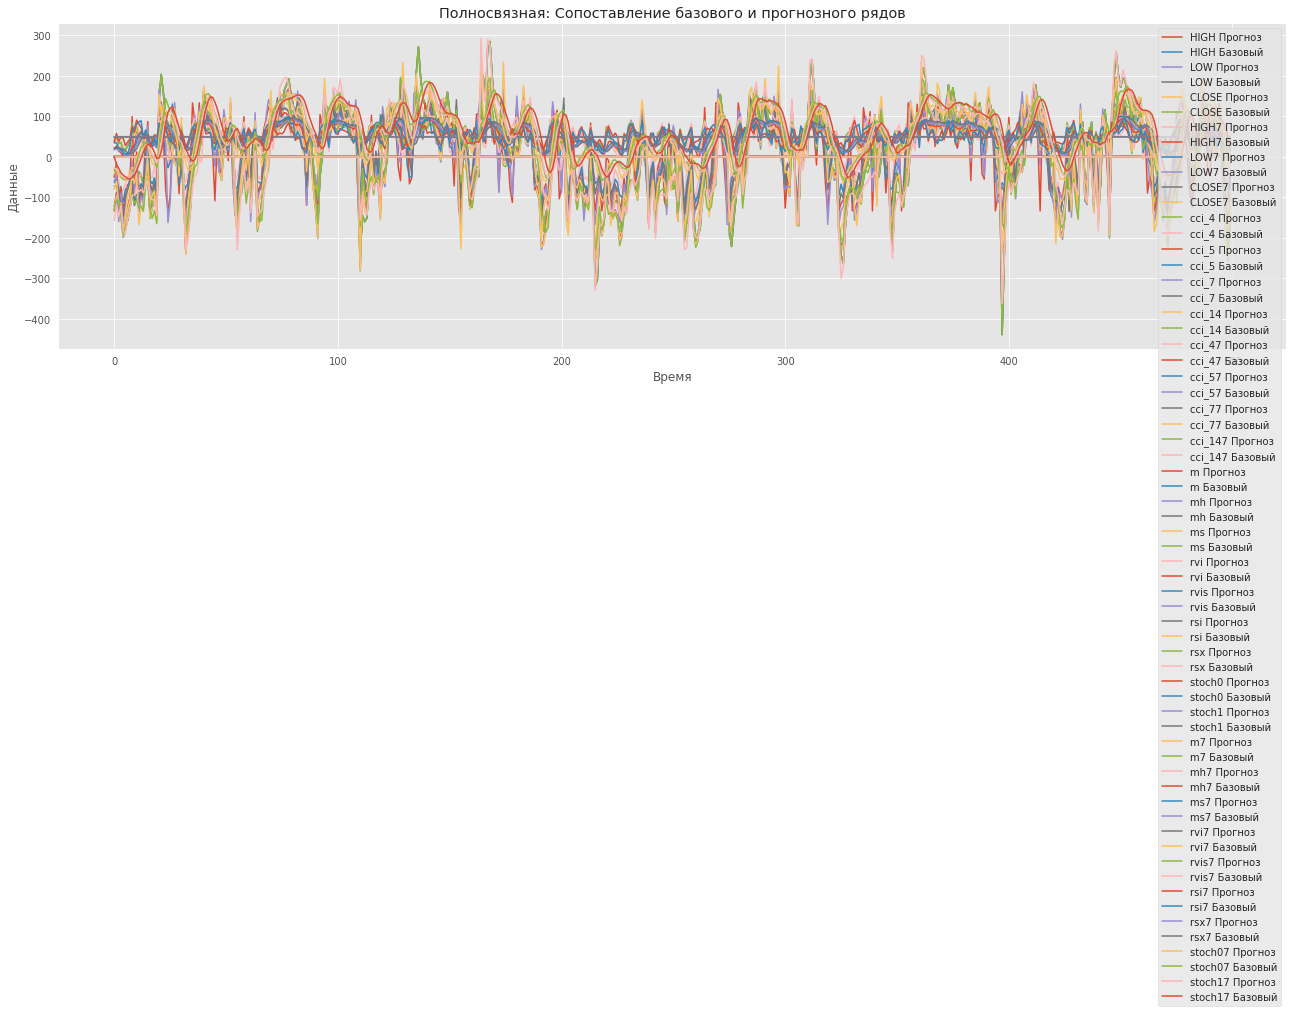

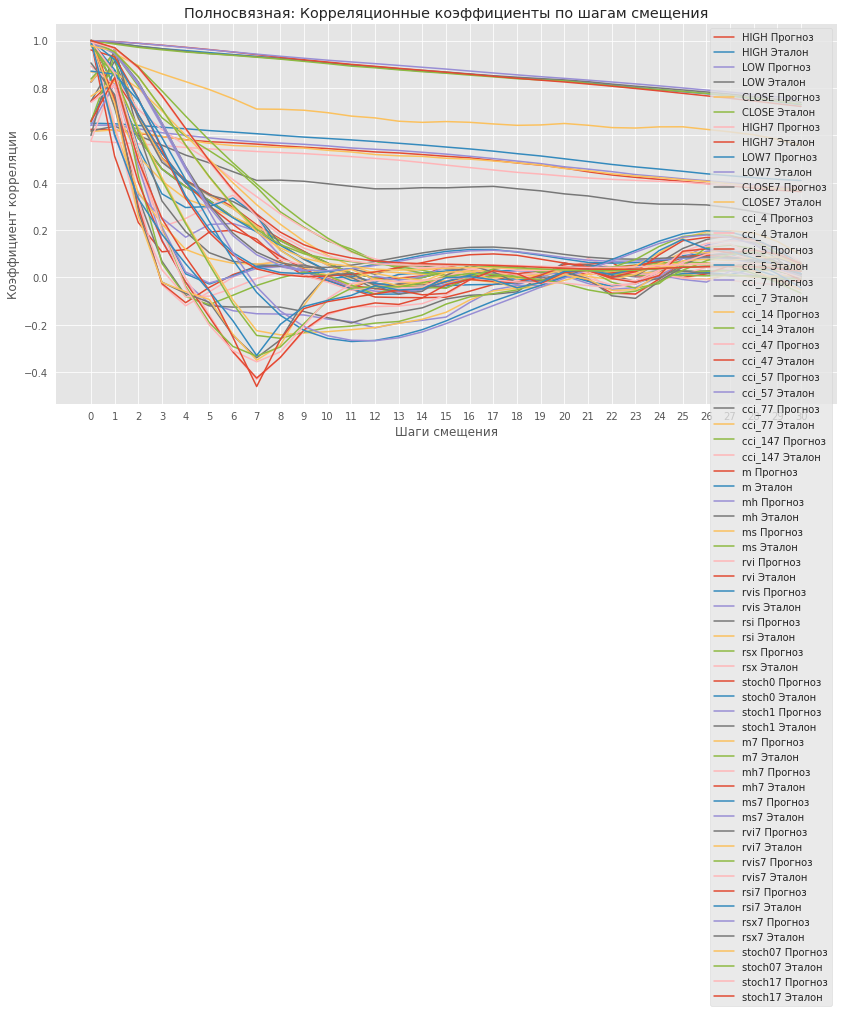

/content/drive/MyDrive/logs/gbpusd_N_5 
Обучение 5 эпох
Epoch 1/5
4840/4844 [============================>.] - ETA: 0s - loss: 0.0082
Epoch 1: val_loss improved from inf to 0.00939, saving model to /content/drive/MyDrive/gbpusd_N_5 .h5
4844/4844 [==============================] - 30s 6ms/step - loss: 0.0082 - val_loss: 0.0094
Epoch 2/5
4843/4844 [============================>.] - ETA: 0s - loss: 0.0082
Epoch 2: val_loss did not improve from 0.00939
4844/4844 [==============================] - 28s 6ms/step - loss: 0.0082 - val_loss: 0.0094
Epoch 3/5
4840/4844 [============================>.] - ETA: 0s - loss: 0.0082
Epoch 3: val_loss did not improve from 0.00939
4844/4844 [==============================] - 28s 6ms/step - loss: 0.0082 - val_loss: 0.0094
Epoch 4/5
4836/4844 [============================>.] - ETA: 0s - loss: 0.0081
Epoch 4: val_loss did not improve from 0.00939
4844/4844 [==============================] - 28s 6ms/step - loss: 0.0081 - val_loss: 0.0094
Epoch 5/5
4839/4844 [

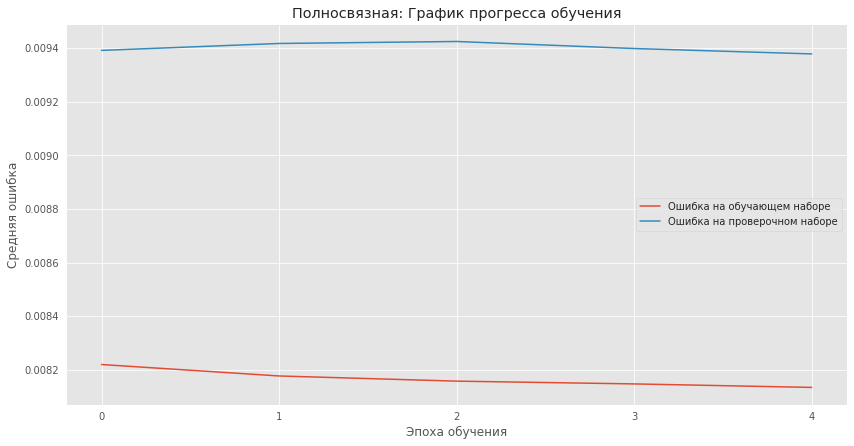

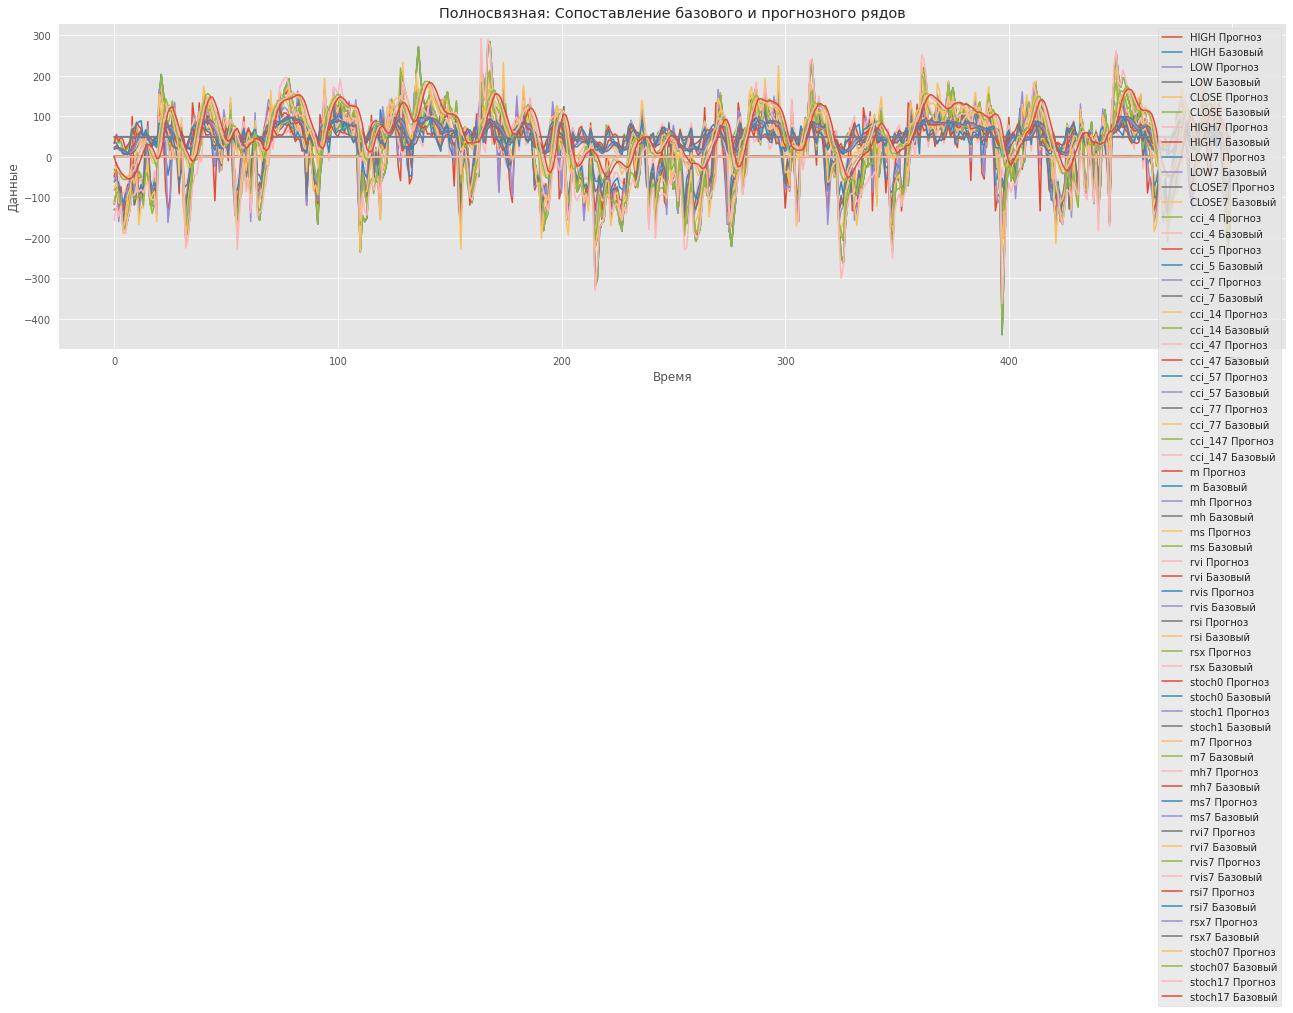

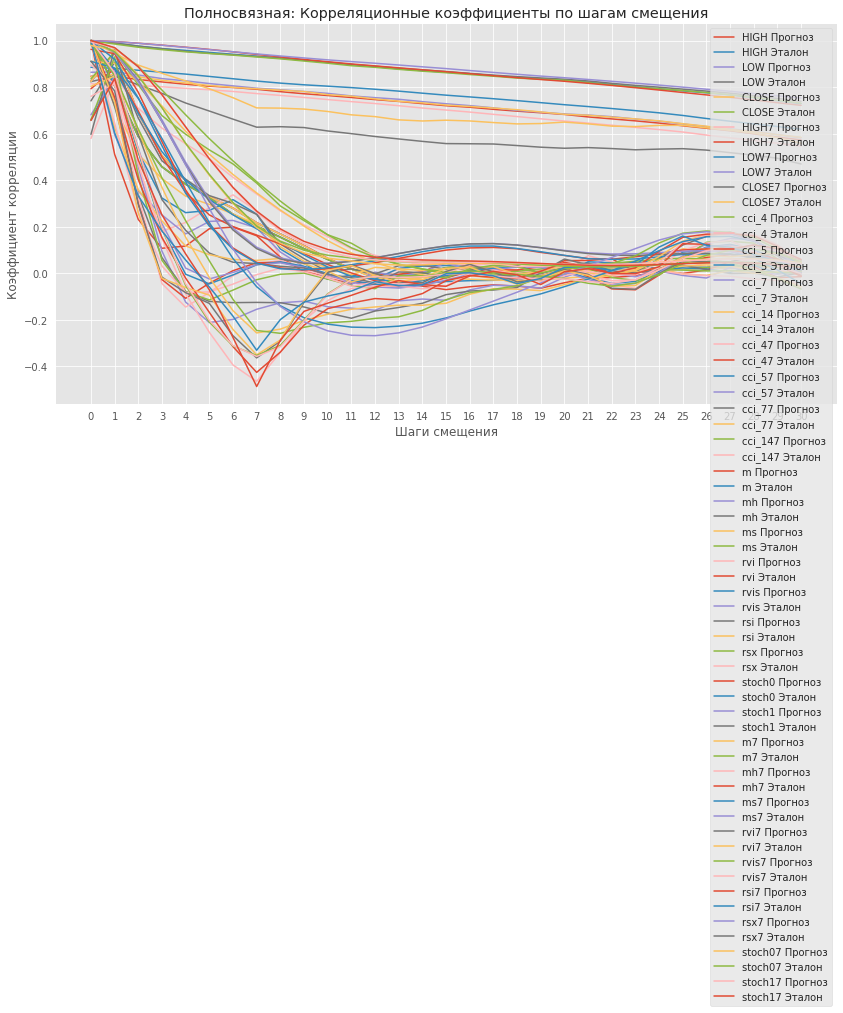

/content/drive/MyDrive/logs/gbpusd_N_5 
Обучение 3 эпох
Epoch 1/3
4841/4844 [============================>.] - ETA: 0s - loss: 0.0081
Epoch 1: val_loss improved from inf to 0.00938, saving model to /content/drive/MyDrive/gbpusd_N_5 .h5
4844/4844 [==============================] - 32s 7ms/step - loss: 0.0081 - val_loss: 0.0094
Epoch 2/3
4844/4844 [==============================] - ETA: 0s - loss: 0.0081
Epoch 2: val_loss did not improve from 0.00938
4844/4844 [==============================] - 31s 6ms/step - loss: 0.0081 - val_loss: 0.0094
Epoch 3/3
4844/4844 [==============================] - ETA: 0s - loss: 0.0081
Epoch 3: val_loss did not improve from 0.00938
4844/4844 [==============================] - 31s 6ms/step - loss: 0.0081 - val_loss: 0.0094


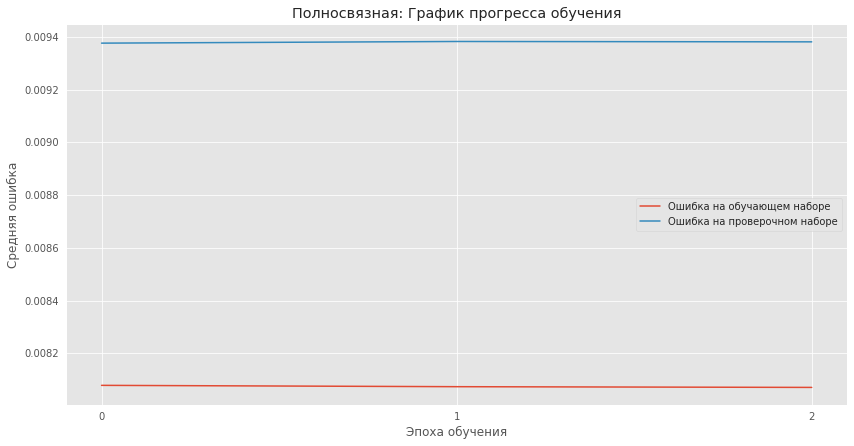

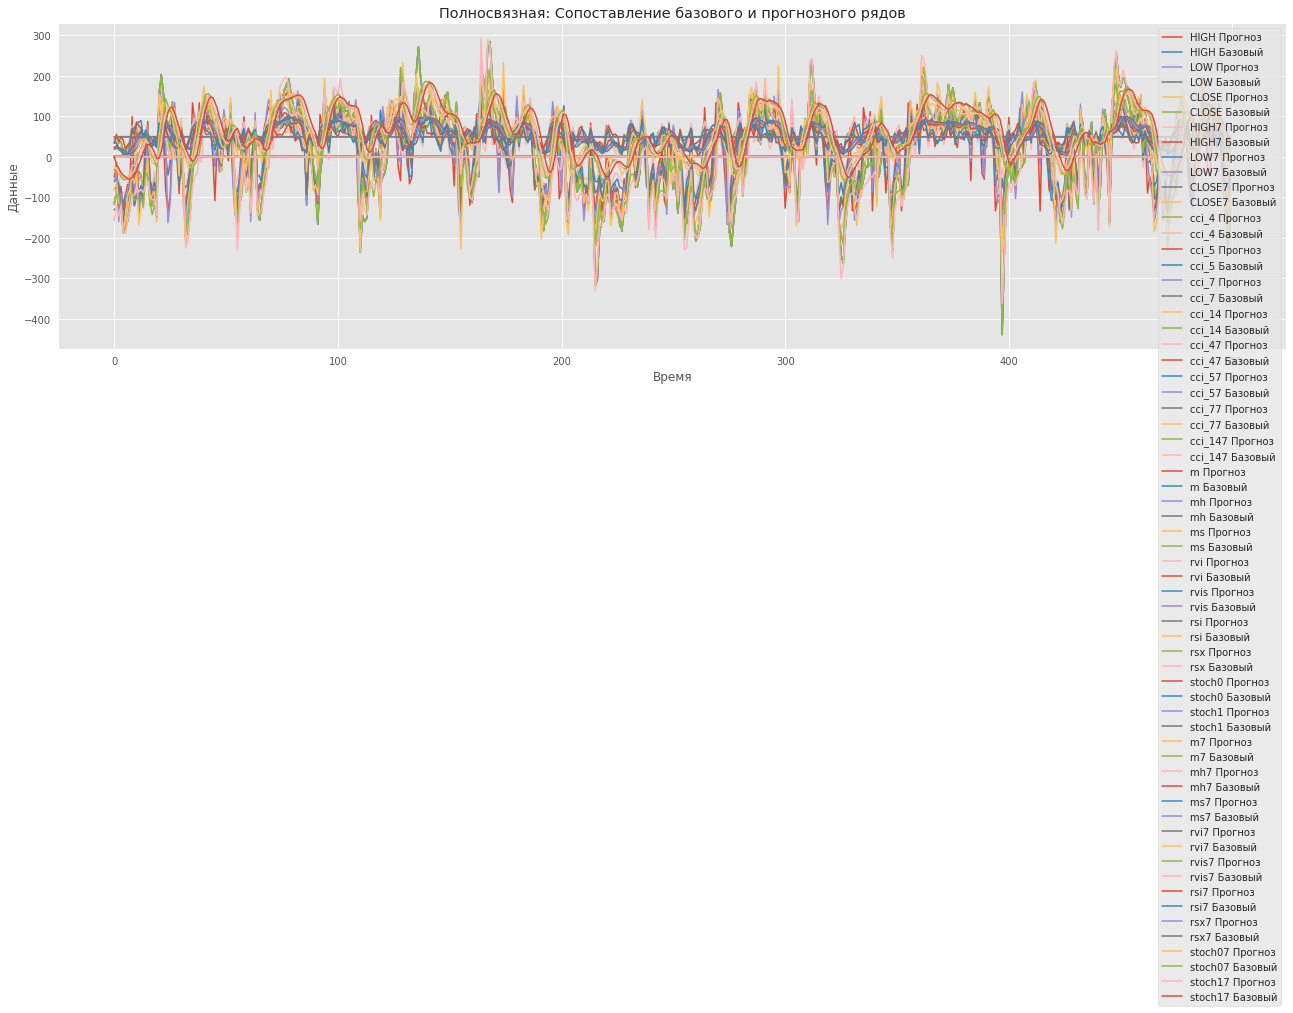

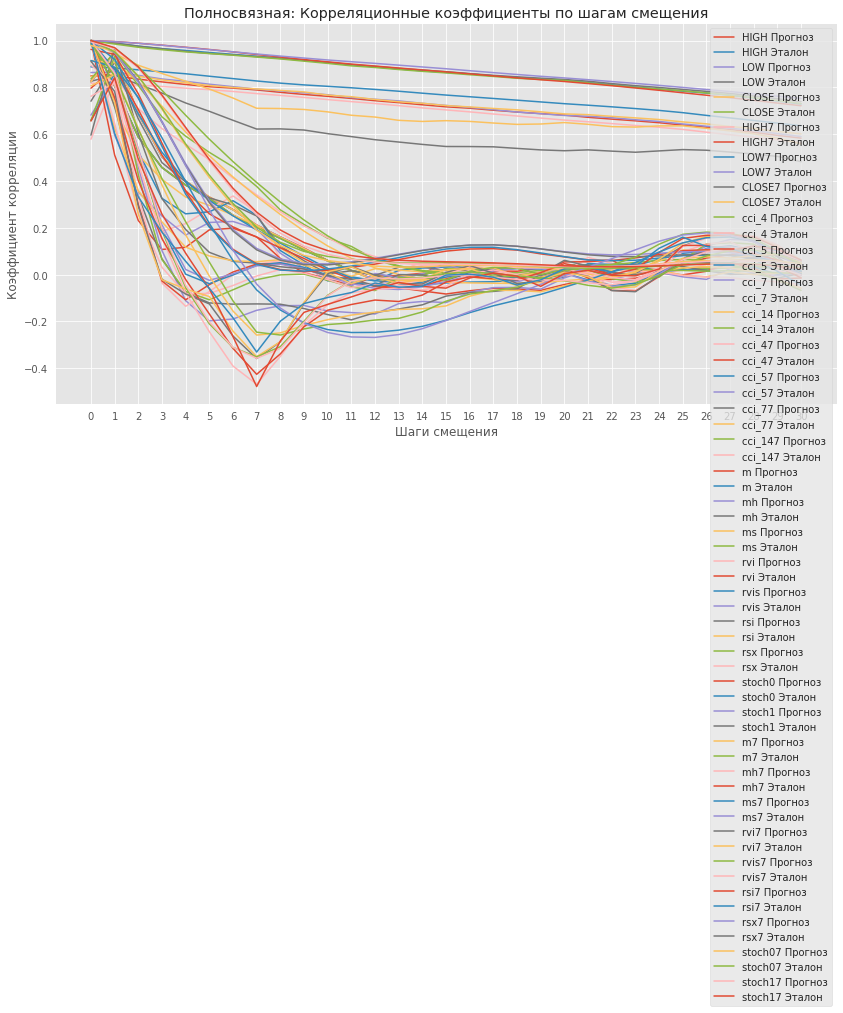

In [ ]:
path = '/content/drive/MyDrive/'
log_dir1= '/content/drive/MyDrive/logs/'
# Обучение модели 

filename = 'gbpusd_N_5 ' 
ex = '.h5'

train_eval_net(model_dense, train_datagen, val_datagen, [(10, Adam(lr=1e-4)),
                                                         (5, Adam(lr=1e-5)),
                                                         (3, Adam(lr=1e-6))],
               x_test, y_test, y_scaler, title='Полносвязная',
                                                       model_filename = filename + ex ,
                                                       log_dir=log_dir1 + filename)

In [ ]:
# Сохранение модели
model_dense.save('/content/drive/MyDrive/p5allccirviCol5.h5')

In [ ]:
# Получене результатов предсказания для визуализации в matplotlib
aaa, aaa1 = get_b_pred(model_dense, # модель
             x_b_test, y_b_test, # тестовая выборка
             y_scaler)#: # масштабирующий объект для y

# Сохранение результатов 
np.save('/content/drive/MyDrive/MT5/p5allccirviCol603000aaa',aaa)
np.save('/content/drive/MyDrive/MT5/p5allccirviCol603000aaa1',aaa1)             

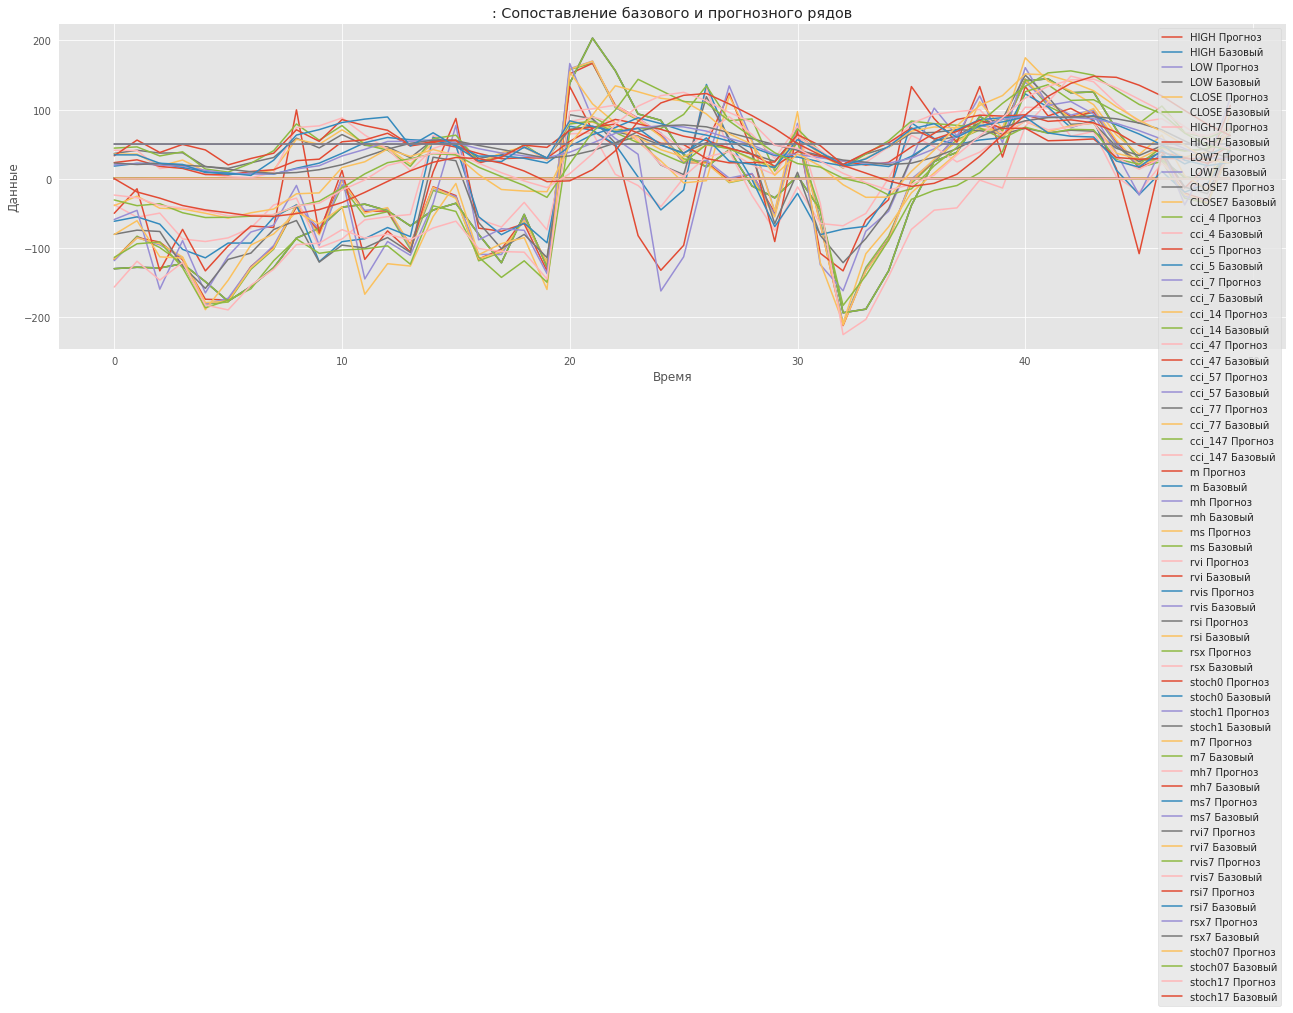

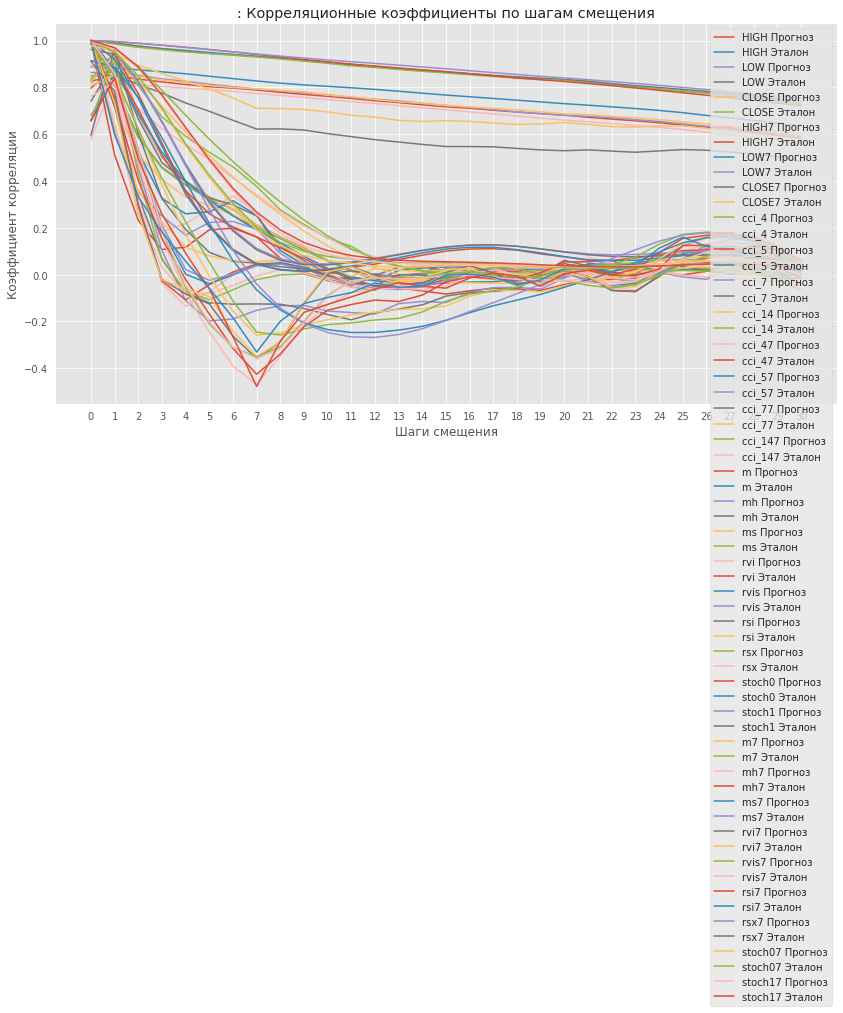

In [ ]:
eval_net(model_dense, x_test, y_test, 
             y_scaler, # нормировщик выхода
             start=0, length=50, back_steps_max=30)

# 7.Выводы

Выводы:
 Реализация прогнозирования временных рядов свелась не столько к подбору архитектуры нейронной сети, сколько к подбору данных. Как было указано выше, НС считат минимальной ожибкой для себя  максимально приблеженное повторение прдыдущих данных. При анализе прогнозирования тренда возникала такая же проблема. 

# 8. План дальнейшей работы

В планы дальнейшей работы входит: 
Доработка "realtime" обработки данных,
Визуализация посредством mplfinance,
Визуализация посредством plotly Dash,
Размещение визуализации Dash на пресональном сервере, 